In [1]:
import pandas as pd

df = pd.read_csv('kalimati_tarkari_dataset_cleaned.csv')
df_two = pd.read_csv('kalimati-tarkari-prices-from-may-2021-to-september-2023.csv')
df_three = pd.read_csv('kalimati_prices.csv')
df_three['Date'] = pd.to_datetime(df_three['Date'], format="%Y-%m-%d")
df_one =  pd.concat([df, df_two,df_three], ignore_index=True)
simulated_df = pd.read_csv('simulated_dataset.csv',index_col=False)
df_one.drop('SN',axis=1,inplace=True)
df_one.drop_duplicates(inplace=True)
print(type(df_one['Date'][0]))
all_dates = df_one['Date'].drop_duplicates()
all_commodities = df_one['Commodity'].drop_duplicates()

# 3. Create full Date × Commodity grid
full_grid = pd.MultiIndex.from_product(
    [all_dates, all_commodities],
    names=['Date', 'Commodity']
).to_frame(index=False)

# 4. Merge the full grid with your data
df_full = pd.merge(full_grid, df_one, on=['Date', 'Commodity'], how='left')

# 5. (Optional) Sort for readability
df_full = df_full.sort_values(['Commodity', 'Date']).reset_index(drop=True)

df_full['Date'] = pd.to_datetime(df_full['Date'])
df_full['Year'] = df_full['Date'].dt.year
df_full['Month'] = df_full['Date'].dt.month
df_full['Day'] = df_full['Date'].dt.day

df_full.drop('Date',axis=1,inplace=True)

df_full['Weekday'] = (pd.to_datetime(df_full[['Year', 'Month', 'Day']])).dt.day_name()

df_practice = df_full.copy()

# Step 1: For each commodity, get the first non-null unit (lowercased)
unit_map = (
    df_practice.groupby('Commodity')['Unit']
    .apply(lambda x: next((u.lower() for u in x if pd.notna(u)), None))
    .to_dict()
)

# Step 2: Fill NaNs in 'Unit' column using this map
df_practice['Unit'] = df_practice.apply(
    lambda row: unit_map.get(row['Commodity'], None) if pd.isna(row['Unit']) else row['Unit'].lower(),
    axis=1
)

df_practice = df_practice.sort_values(['Year','Month','Day'])
df_practice['Available'] = df_practice['Average'].notna()

df_practice.drop(['Unit','Minimum','Maximum','Average'],axis=1,inplace=True	)

#df_practice = pd.concat([df_practice, simulated_df], ignore_index=True)
#if 'Unnamed: 0' in df_practice.columns:
    #df_practice = df_practice.drop(columns=['Unnamed: 0'])
df_practice.drop_duplicates(subset=['Month', 'Day', 'Year', 'Commodity'],inplace=True)
df_test= df_practice.copy()



<class 'str'>


In [24]:
df_three

,Date,Commodity,Unit,Minimum,Maximum,Average
0,2023-09-28,Tomato Big(Indian),kg,40.0,50.0,45.0
1,2023-09-28,Tomato Small(Local),kg,50.0,60.0,55.0
2,2023-09-28,Tomato Small(Tunnel),kg,60.0,75.0,69.0
3,2023-09-28,Tomato Small(Indian),kg,45.0,55.0,50.0
4,2023-09-28,Potato Red,kg,56.0,58.0,57.0
...,...,...,...,...,...,...
62112,2025-06-07,Fish Fresh(Rahu),kg,310.0,330.0,320.0
62113,2025-06-07,Fish Fresh(Bachuwa),kg,300.0,320.0,310.0
62114,2025-06-07,Fish Fresh(Chhadi),kg,220.0,240.0,230.0
62115,2025-06-07,Arum,kg,280.0,300.0,290.0


In [73]:
df_one

,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),6/16/2013,Kg,35,40,37.5
1,Tomato Small(Local),6/16/2013,Kg,26,32,29.0
2,Potato Red,6/16/2013,Kg,20,21,20.5
3,Potato White,6/16/2013,Kg,15,16,15.5
4,Onion Dry (Indian),6/16/2013,Kg,28,30,29.0
...,...,...,...,...,...,...
293636,Tomato Small(Indian),9/28/2023,KG,Rs 45.00,Rs 55.00,Rs 50.00
293637,Tomato Small(Local),9/28/2023,KG,Rs 50.00,Rs 60.00,Rs 55.00
293638,Tomato Small(Tunnel),9/28/2023,KG,Rs 60.00,Rs 75.00,Rs 69.00
293639,Turnip A,9/28/2023,KG,Rs 70.00,Rs 80.00,Rs 75.00


In [25]:
#predict at what year we can get it/ it is available at shop
#predict the price
#predict when the price will be its lowest

In [45]:
df_practice[(df_practice['Year'] == 2023) & (df_practice['Month'] == 10 )]

,Commodity,Year,Month,Day,Weekday,Available


In [47]:
df_practice

,Commodity,Year,Month,Day,Weekday,Available
2395,Amla,2013,6,16,Sunday,False
6137,Apple(Fuji),2013,6,16,Sunday,False
9869,Apple(Jholey),2013,6,16,Sunday,True
13608,Arum,2013,6,16,Sunday,False
17295,Asparagus,2013,6,16,Sunday,True
...,...,...,...,...,...,...
489563,Turnip,2023,9,28,Thursday,False
493301,Turnip A,2023,9,28,Thursday,True
496928,Water Melon(Dotted),2023,9,28,Thursday,False
500672,Water Melon(Green),2023,9,28,Thursday,True


In [38]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import StandardScaler

In [39]:
# encoder = OneHotEncoder(sparse_output=False)
# encoded = encoder.fit_transform(df_practice[['Commodity', 'Weekday']])
# encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Commodity', 'Weekday']))
# encoded_df

,Commodity_Amla,Commodity_Apple(Fuji),Commodity_Apple(Jholey),Commodity_Arum,Commodity_Asparagus,Commodity_Avocado,Commodity_Bakula,Commodity_Bamboo Shoot,Commodity_Banana,Commodity_Barela,...,Commodity_Water Melon(Dotted),Commodity_Water Melon(Green),Commodity_Yam,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
504474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
504475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
504476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [40]:
# df_practice = pd.concat([df_practice.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
# df_practice

,Commodity,Year,Month,Day,Weekday,Available,Commodity_Amla,Commodity_Apple(Fuji),Commodity_Apple(Jholey),Commodity_Arum,...,Commodity_Water Melon(Dotted),Commodity_Water Melon(Green),Commodity_Yam,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,Amla,2013,6,16,Sunday,False,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Apple(Fuji),2013,6,16,Sunday,False,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Apple(Jholey),2013,6,16,Sunday,True,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Arum,2013,6,16,Sunday,False,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Asparagus,2013,6,16,Sunday,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504473,Turnip,2023,9,28,Thursday,False,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
504474,Turnip A,2023,9,28,Thursday,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
504475,Water Melon(Dotted),2023,9,28,Thursday,False,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
504476,Water Melon(Green),2023,9,28,Thursday,True,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
# X_train, X_test, y_train,y_test = train_test_split(df_practice.drop(['Commodity','Available','Weekday'],axis=1),df_practice['Available'],train_size=0.9,random_state=42)

In [42]:
# X_train, X_test, y_train,y_test = train_test_split(df_practice.drop(['Commodity','Available','Weekday'],axis=1),df_practice['Available'],train_size=0.9,random_state=42)
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [43]:
# model = LogisticRegression(solver='saga',max_iter=1000)

In [44]:
# model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [45]:
# pred = model.predict(X_test_scaled)

In [46]:
# from sklearn.metrics import classification_report

In [47]:
# print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.78      0.82      0.80     21111
        True       0.86      0.83      0.85     29337

    accuracy                           0.83     50448
   macro avg       0.82      0.83      0.82     50448
weighted avg       0.83      0.83      0.83     50448



In [48]:
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier()
# classifier.fit(X_train_scaled,y_train)
# pred2 = classifier.predict(X_test_scaled)
# print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

       False       0.97      0.95      0.96     21111
        True       0.97      0.98      0.97     29337

    accuracy                           0.97     50448
   macro avg       0.97      0.97      0.97     50448
weighted avg       0.97      0.97      0.97     50448



In [36]:
df_practice

,Commodity,Year,Month,Day,Weekday,Available
2395,Amla,2013,6,16,Sunday,False
6137,Apple(Fuji),2013,6,16,Sunday,False
9869,Apple(Jholey),2013,6,16,Sunday,True
13608,Arum,2013,6,16,Sunday,False
17295,Asparagus,2013,6,16,Sunday,True
...,...,...,...,...,...,...
489563,Turnip,2023,9,28,Thursday,False
493301,Turnip A,2023,9,28,Thursday,True
496928,Water Melon(Dotted),2023,9,28,Thursday,False
500672,Water Melon(Green),2023,9,28,Thursday,True


In [44]:
# commodity_encoder = LabelEncoder()
# weekday_encoder = LabelEncoder()

# # Fit and transform the columns
# df_practice['Commodity_encoded'] = commodity_encoder.fit_transform(df_practice['Commodity'])
# df_practice['Weekday_encoded'] = weekday_encoder.fit_transform(df_practice['Weekday'])

In [45]:
df_practice

,Commodity,wtf,Year,Month,Day,Weekday,Available,Commodity_Amla,Commodity_Apple(Fuji),Commodity_Apple(Jholey),...,Commodity_Yam,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Commodity_encoded,Weekday_encoded
0,Amla,NaN,2013,6,16,Sunday,False,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,3
1,Apple(Fuji),NaN,2013,6,16,Sunday,False,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,3
2,Apple(Jholey),120.0,2013,6,16,Sunday,True,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,3
3,Arum,NaN,2013,6,16,Sunday,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,3
4,Asparagus,150.0,2013,6,16,Sunday,True,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504473,Turnip,NaN,2023,9,28,Thursday,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,131,4
504474,Turnip A,NaN,2023,9,28,Thursday,True,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,132,4
504475,Water Melon(Dotted),NaN,2023,9,28,Thursday,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,133,4
504476,Water Melon(Green),NaN,2023,9,28,Thursday,True,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,134,4


In [46]:
# X_train, X_test, y_train,y_test = train_test_split(df_practice.drop(['Commodity','Available','Weekday'],axis=1),df_practice['Available'],train_size=0.9,random_state=42)

In [47]:
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [1]:
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier()
# classifier.fit(X_train_scaled,y_train)
# pred2 = classifier.predict(X_test_scaled)
# print(classification_report(y_test,pred2))

In [55]:
# df[df['Commodity']=='Raddish White(Hybrid)']['Average'].notna().sum()/df[df['Commodity']=='Raddish White(Hybrid)'].shape[0]

np.float64(0.4462854088722608)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df_practice[['Commodity', 'Weekday']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Commodity', 'Weekday']))

df_practice = pd.concat([df_practice.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

X_train, X_test, y_train,y_test = train_test_split(df_practice.drop(['Commodity','Available','Weekday'],axis=1),df_practice['Available'],train_size=0.9,random_state=42)
feature_names = X_train.columns
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier()
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train_scaled,y_train)
pred2 = classifier.predict(X_test_scaled)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

       False       0.86      0.91      0.88     21053
        True       0.93      0.89      0.91     28125

    accuracy                           0.90     49178
   macro avg       0.89      0.90      0.89     49178
weighted avg       0.90      0.90      0.90     49178



In [38]:
import matplotlib.pyplot as plt

In [32]:
df

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),6/16/2013,Kg,35,40,37.5
1,1,Tomato Small(Local),6/16/2013,Kg,26,32,29.0
2,2,Potato Red,6/16/2013,Kg,20,21,20.5
3,3,Potato White,6/16/2013,Kg,15,16,15.5
4,4,Onion Dry (Indian),6/16/2013,Kg,28,30,29.0
...,...,...,...,...,...,...,...
197156,197156,Garlic Dry Nepali,5/13/2021,Kg,100,120,110.0
197157,197157,Fish Fresh(Rahu),5/13/2021,KG,270,280,275.0
197158,197158,Fish Fresh(Bachuwa),5/13/2021,KG,225,235,230.0
197159,197159,Fish Fresh(Chhadi),5/13/2021,KG,220,230,225.0


In [36]:
df_test['Available'] = df_test['Average'].notna()

In [37]:
df

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),6/16/2013,Kg,35,40,37.5
1,1,Tomato Small(Local),6/16/2013,Kg,26,32,29.0
2,2,Potato Red,6/16/2013,Kg,20,21,20.5
3,3,Potato White,6/16/2013,Kg,15,16,15.5
4,4,Onion Dry (Indian),6/16/2013,Kg,28,30,29.0
...,...,...,...,...,...,...,...
197156,197156,Garlic Dry Nepali,5/13/2021,Kg,100,120,110.0
197157,197157,Fish Fresh(Rahu),5/13/2021,KG,270,280,275.0
197158,197158,Fish Fresh(Bachuwa),5/13/2021,KG,225,235,230.0
197159,197159,Fish Fresh(Chhadi),5/13/2021,KG,220,230,225.0


In [42]:
df.groupby('Month')['Available'].sum()

Month
1     27399
2     25260
3     27133
4     25976
5     23771
6     23315
7     24565
8     24159
9     23524
10    21391
11    22737
12    24411
Name: Available, dtype: int64

In [33]:
df_test['Month'].unique()

array([ 1, 10, 11, 12,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int32)

In [44]:
df.Commodity == 'Apple(Jholey)'

2395      False
6137      False
9869       True
13608     False
17295     False
          ...  
489563    False
493301    False
496928    False
500672    False
504381    False
Name: Commodity, Length: 504478, dtype: bool

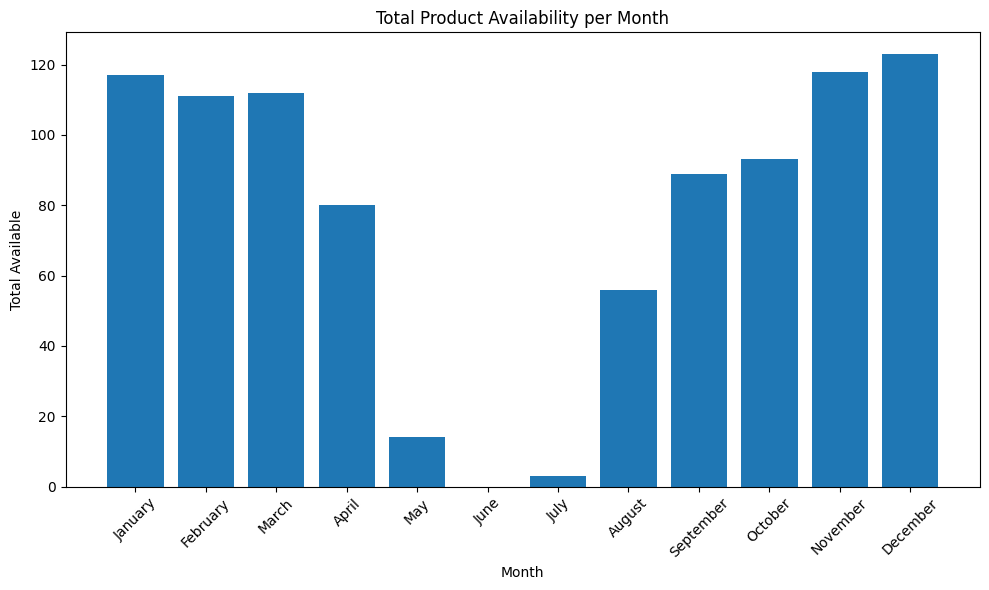

In [2]:
import matplotlib.pyplot as plt
month_map = {
    1: 'January', 2: 'February', 3: 'March',     4: 'April',
    5: 'May',     6: 'June',     7: 'July',      8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Group and sum availability by month
month_availability = df_test[df_test.Commodity == 'Amla'].groupby('Month')['Available'].sum()

# Convert month numbers to names manually
month_names = [month_map[m] for m in month_availability.index]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(month_names, month_availability.values)
plt.xlabel('Month')
plt.ylabel('Total Available')
plt.title('Total Product Availability per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
from sklearn.model_selection import GridSearchCV

# Base model
xgb_model = XGBClassifier (eval_metric='logloss',device='cpu')

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

# Grid search
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=3,
                           verbose=1,
                           n_jobs=8)

# Fit to your data
grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
# Evaluate
y_pred = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\LEGION\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:21:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

       False       0.95      0.95      0.95     21111
        True       0.96      0.96      0.96     29337

    accuracy                           0.95     50448
   macro avg       0.95      0.95      0.95     50448
weighted avg       0.95      0.95      0.95     50448



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df_practice[['Commodity', 'Weekday']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Commodity', 'Weekday']))

df_practice = pd.concat([df_practice.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

X_train, X_test, y_train,y_test = train_test_split(df_practice.drop(['Commodity','Available','Weekday'],axis=1),df_practice['Available'],train_size=0.9,random_state=42)
feature_names = X_train.columns
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
""
#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier()
from xgboost import XGBClassifier
classifier = XGBClassifier(
    colsample_bytree= 1, 
    learning_rate= 0.2, 
    max_depth= 9,
    n_estimators= 200,
    subsample= 0.8
)
classifier.fit(X_train_scaled,y_train)
pred2 = classifier.predict(X_test_scaled)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

       False       0.94      0.93      0.94     24691
        True       0.95      0.96      0.95     33697

    accuracy                           0.95     58388
   macro avg       0.95      0.95      0.95     58388
weighted avg       0.95      0.95      0.95     58388



In [4]:
def predict(year,month,day,commodity,threshold):
    df_train = pd.DataFrame({
        'Commodity': commodity,
        'Year': year,
        'Month': month,
        'Day': day})
    df_train['Weekday'] = pd.to_datetime(df_train[['Year', 'Month', 'Day']]).dt.day_name()


    encoded_train = encoder.transform(df_train[['Commodity', 'Weekday']])
    encoded_df_train = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(['Commodity', 'Weekday']))
    encoded_df_train = pd.concat([df_train.reset_index(drop=True), encoded_df_train.reset_index(drop=True)], axis=1)

    encoded_df_train.drop(['Commodity','Weekday'],axis=1,inplace=True)
    
    encoded_df_train =  encoded_df_train.reindex(columns=feature_names, fill_value=0)
    scaled_encoded_df_train = scaler.transform(encoded_df_train)

    probability = classifier.predict_proba(scaled_encoded_df_train)

    prediction = np.where(probability[:, 1] >= threshold, 1, 0)
   
    return prediction
    


In [12]:
import requests
from bs4 import BeautifulSoup
from sklearn.metrics import f1_score
url = 'https://ramropatro.com/vegetable'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

tbody = soup.find('tbody')
table_rows = tbody.find_all('tr')
items = []
for rows in table_rows:
    items += [rows.find('td').text]
items = [item for item in items if item]
score = predict([2025]*len(items),[6]*len(items),[16]*len(items),items,0.8)
index = [index for index,value in enumerate(score) if value==0]
all_commodity = df_test['Commodity'].unique()
y_actual = [1 if commodity in items else 0 for commodity in all_commodity ]
y_predicted =[]
threshold_range = np.arange(0.68,0.9,0.02)
highest_value = {'threshold':0,'f1':0}
for threshold in threshold_range:
    y_predicted = predict([2025]*len(all_commodity),[6]*len(all_commodity),[16]*len(all_commodity),all_commodity,threshold)
    f1 = f1_score(y_actual,y_predicted)
    if (f1) > (highest_value['f1']):
        highest_value['f1'] = f1
        highest_value['threshold'] = threshold
y_predicted = predict([2025]*len(all_commodity),[6]*len(all_commodity),[16]*len(all_commodity),all_commodity,highest_value['threshold'])        
print(classification_report(y_actual,y_predicted)) 
print(highest_value['threshold'])

              precision    recall  f1-score   support

           0       0.75      0.76      0.75        50
           1       0.86      0.85      0.86        88

    accuracy                           0.82       138
   macro avg       0.80      0.81      0.80       138
weighted avg       0.82      0.82      0.82       138

0.7000000000000001


In [14]:
y_test_prob = classifier.predict_proba(X_test_scaled)
y_test_predicted = np.where(y_test_prob[:, 1] >= 0.5, 1, 0)
print(classification_report(y_test,y_test_predicted)) 

              precision    recall  f1-score   support

       False       0.95      0.95      0.95     21167
        True       0.96      0.96      0.96     28025

    accuracy                           0.96     49192
   macro avg       0.96      0.96      0.96     49192
weighted avg       0.96      0.96      0.96     49192



In [19]:
score = predict([2025]*len(items),[5]*len(items),[23]*len(items),items,0.5)
print(score)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [251]:
print(score.sum()/len(score))

0.9587628865979382


In [252]:
len(score)

97

Potato Red(Mude)
Arum
Apple(Jholey)
Mango(Chousa)
Litchi(Indian)


In [6]:
month = 1
day = 1
for year in range(2013,2030):
    y_predicted_test = predict([year]*len(all_commodity),[month]*len(all_commodity),[day]*len(all_commodity),all_commodity,0.7)
    y_actual_test = df_practice[((df_practice['Year']==year) & (df_practice['Month']==month) & (df_practice['Day']==day))]['Available'].sum()
    print(f'Year {year}: {y_predicted_test.sum()} , Actual Available: {y_actual_test}')

Year 2013: 60 , Actual Available: 0
Year 2014: 60 , Actual Available: 78
Year 2015: 60 , Actual Available: 79
Year 2016: 62 , Actual Available: 73
Year 2017: 58 , Actual Available: 71
Year 2018: 56 , Actual Available: 68
Year 2019: 57 , Actual Available: 69
Year 2020: 67 , Actual Available: 85
Year 2021: 99 , Actual Available: 102
Year 2022: 101 , Actual Available: 109
Year 2023: 107 , Actual Available: 111
Year 2024: 95 , Actual Available: 100
Year 2025: 95 , Actual Available: 96
Year 2026: 95 , Actual Available: 0
Year 2027: 95 , Actual Available: 0
Year 2028: 95 , Actual Available: 0
Year 2029: 95 , Actual Available: 0


In [21]:
len(score)

97

In [254]:
print(classification_report(y_actual,y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        39
           1       0.89      0.96      0.93        97

    accuracy                           0.89       136
   macro avg       0.88      0.84      0.86       136
weighted avg       0.89      0.89      0.89       136



In [23]:
feature_names = X_train.columns

In [24]:
df

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),6/16/2013,Kg,35,40,37.5
1,1,Tomato Small(Local),6/16/2013,Kg,26,32,29.0
2,2,Potato Red,6/16/2013,Kg,20,21,20.5
3,3,Potato White,6/16/2013,Kg,15,16,15.5
4,4,Onion Dry (Indian),6/16/2013,Kg,28,30,29.0
...,...,...,...,...,...,...,...
197156,197156,Garlic Dry Nepali,5/13/2021,Kg,100,120,110.0
197157,197157,Fish Fresh(Rahu),5/13/2021,KG,270,280,275.0
197158,197158,Fish Fresh(Bachuwa),5/13/2021,KG,225,235,230.0
197159,197159,Fish Fresh(Chhadi),5/13/2021,KG,220,230,225.0


In [25]:
(df['Date']=='5/22/2020').sum()

np.int64(61)

In [26]:
df_practice

,Commodity,Year,Month,Day,Weekday,Available,Commodity_Amla,Commodity_Apple(Fuji),Commodity_Apple(Jholey),Commodity_Arum,...,Commodity_Water Melon(Dotted),Commodity_Water Melon(Green),Commodity_Yam,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,Amla,2013,6,16,Sunday,False,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Apple(Fuji),2013,6,16,Sunday,False,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Apple(Jholey),2013,6,16,Sunday,True,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Arum,2013,6,16,Sunday,False,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Asparagus,2013,6,16,Sunday,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491771,Turnip,2023,9,28,Thursday,False,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
491772,Turnip A,2023,9,28,Thursday,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
491773,Water Melon(Dotted),2023,9,28,Thursday,False,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
491774,Water Melon(Green),2023,9,28,Thursday,True,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
df_practice[((df_practice['Year']==2023) & (df_practice['Month']==1) & (df_practice['Day']==1))]['Available'].sum()

np.int64(111)

In [29]:
for year in range(2014,2024):
    print(df_practice[((df_practice['Year']==year) & (df_practice['Month']==5) & (df_practice['Day']==25))]['Available'].sum())

72
70
67
68
64
63
61
86
102
100


In [203]:
df_test

,Commodity,Unit,Minimum,Maximum,Average,Year,Month,Day,Available
0,Amla,NaN,NaN,NaN,NaN,2014,1,1,NaN
1,Amla,NaN,NaN,NaN,NaN,2015,1,1,NaN
2,Amla,NaN,NaN,NaN,NaN,2016,1,1,NaN
3,Amla,NaN,NaN,NaN,NaN,2017,1,1,NaN
4,Amla,NaN,NaN,NaN,NaN,2018,1,1,NaN
...,...,...,...,...,...,...,...,...,...
589881,Turnip,NaN,NaN,NaN,NaN,2025,5,29,0.0
589882,Turnip A,NaN,NaN,NaN,NaN,2025,5,29,1.0
589883,Water Melon(Dotted),NaN,NaN,NaN,NaN,2025,5,29,0.0
589884,Water Melon(Green),NaN,NaN,NaN,NaN,2025,5,29,1.0


In [204]:
df_test['Available'] = df_test['Average'].notna()

In [205]:
df_test

,Commodity,Unit,Minimum,Maximum,Average,Year,Month,Day,Available
0,Amla,NaN,NaN,NaN,NaN,2014,1,1,False
1,Amla,NaN,NaN,NaN,NaN,2015,1,1,False
2,Amla,NaN,NaN,NaN,NaN,2016,1,1,False
3,Amla,NaN,NaN,NaN,NaN,2017,1,1,False
4,Amla,NaN,NaN,NaN,NaN,2018,1,1,False
...,...,...,...,...,...,...,...,...,...
589881,Turnip,NaN,NaN,NaN,NaN,2025,5,29,False
589882,Turnip A,NaN,NaN,NaN,NaN,2025,5,29,False
589883,Water Melon(Dotted),NaN,NaN,NaN,NaN,2025,5,29,False
589884,Water Melon(Green),NaN,NaN,NaN,NaN,2025,5,29,False


In [206]:
df_test.duplicated(subset=['Month', 'Day', 'Year', 'Commodity']).sum()

np.int64(15286)

In [207]:
df_test.drop(['Unit','Minimum','Maximum','Average'],inplace=True,axis=1)

In [255]:
df_test.sort_values('Year',inplace=True)
df_test

,Commodity,Year,Month,Day,Weekday,Available
7,Bamboo Shoot,2013,6,16,Sunday,1
6,Bakula,2013,6,16,Sunday,0
5,Avocado,2013,6,16,Sunday,0
4,Asparagus,2013,6,16,Sunday,1
3,Arum,2013,6,16,Sunday,0
...,...,...,...,...,...,...
577175,Tomato Small(Local),2025,5,29,NaN,1
577174,Tomato Small(Indian),2025,5,29,NaN,0
577173,Tomato Big(Nepali),2025,5,29,NaN,1
577172,Tomato Big(Indian),2025,5,29,NaN,1


In [14]:
df_test_fi = df_test[df_test['Year']>2013]
df_test_fi = df_test[df_test['Month']<10]

In [15]:
df_test.duplicated().sum()

np.int64(0)

In [16]:
x_yearly = df_test_fi['Year'].unique()

In [17]:
y_yearly = df_test_fi.groupby('Year')['Available'].sum()

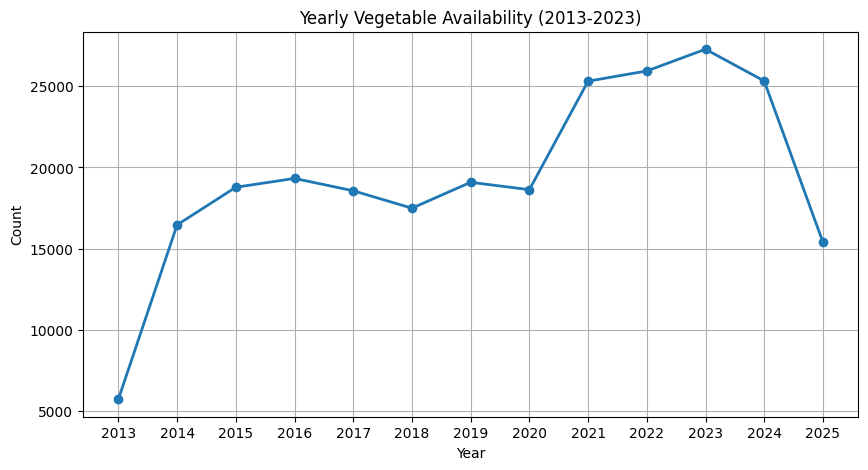

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(x_yearly, y_yearly, linewidth=2, marker='o')

plt.title("Yearly Vegetable Availability (2013-2023)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.xticks(x_yearly)

plt.show()

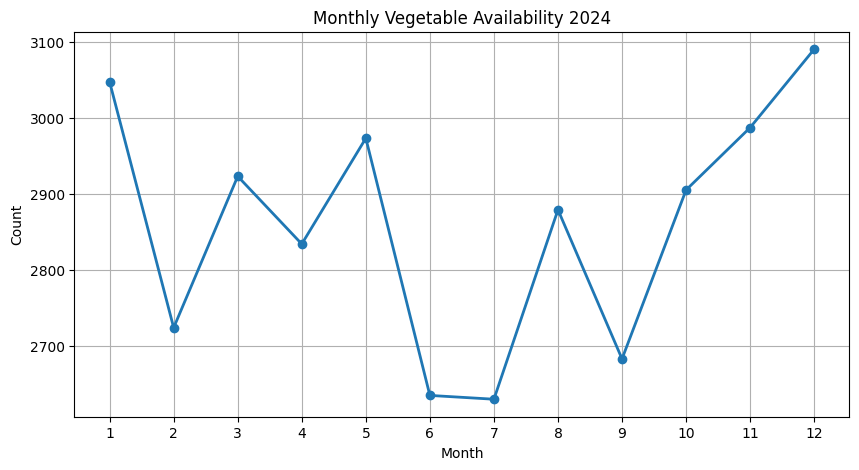

In [23]:
df_test_monthly = df_test[df_test['Year']==2024].copy()
df_test_monthly.sort_values(['Month','Day'],inplace=True)
x_monthly = df_test_monthly['Month'].unique()
y_monthly = df_test_monthly.groupby('Month')['Available'].sum()

plt.figure(figsize=(10,5))
plt.plot(x_monthly, y_monthly, linewidth=2, marker='o')

plt.title("Monthly Vegetable Availability 2024")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True)
plt.xticks(x_monthly)
plt.show()

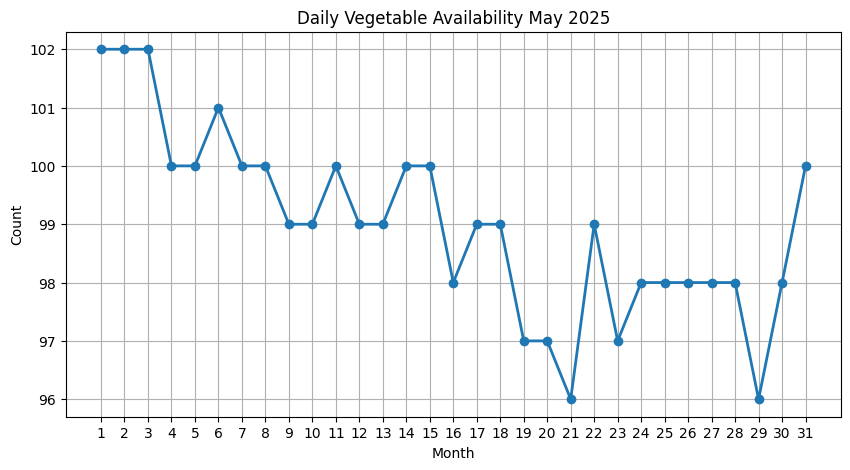

In [26]:
df_test_monthly = df_test[df_test['Year']==2025].copy()
df_test_daily = df_test_monthly[df_test_monthly['Month']==5].copy()
df_test_daily.sort_values('Day',inplace=True)
x_daily = range(1,32)
y_daily = df_test_daily.groupby('Day')['Available'].sum()

plt.figure(figsize=(10,5))
plt.plot(x_daily, y_daily, linewidth=2, marker='o')

plt.title("Daily Vegetable Availability May 2025")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True)
plt.xticks(x_daily)
plt.show()


In [58]:
df_test.duplicated().sum()

np.int64(0)

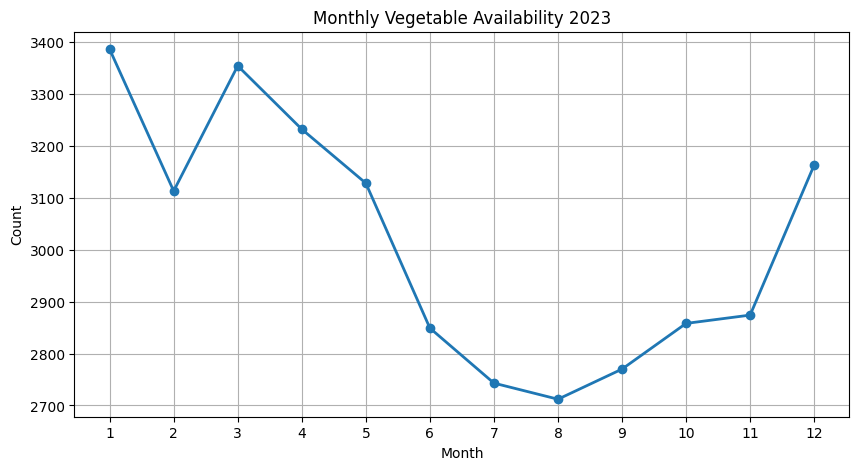

In [27]:
df_test_monthly = df_test[df_test['Year']==2023].copy()
df_test_monthly.sort_values(['Month','Day'],inplace=True)
x_monthly = df_test_monthly['Month'].unique()
y_monthly = df_test_monthly.groupby('Month')['Available'].sum()
plt.figure(figsize=(10,5))
plt.plot(x_monthly, y_monthly, linewidth=2, marker='o')

plt.title("Monthly Vegetable Availability 2023")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True)
plt.xticks(x_monthly)
plt.show()

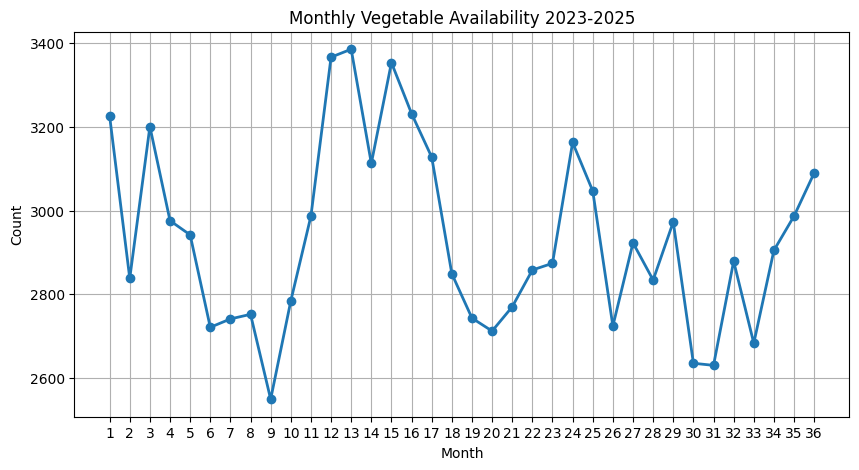

In [31]:
df_test_monthly = df_test[df_test['Year'].isin([2022,2023, 2024])].copy()
df_test_monthly.sort_values(['Year','Month','Day'],inplace=True)
x_monthly = range(1,37)
y_monthly = df_test_monthly.groupby(['Year','Month'])['Available'].sum()

plt.figure(figsize=(10,5))
plt.plot(x_monthly, y_monthly, linewidth=2, marker='o')

plt.title("Monthly Vegetable Availability 2023-2025")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True)
plt.xticks(x_monthly)
plt.show()

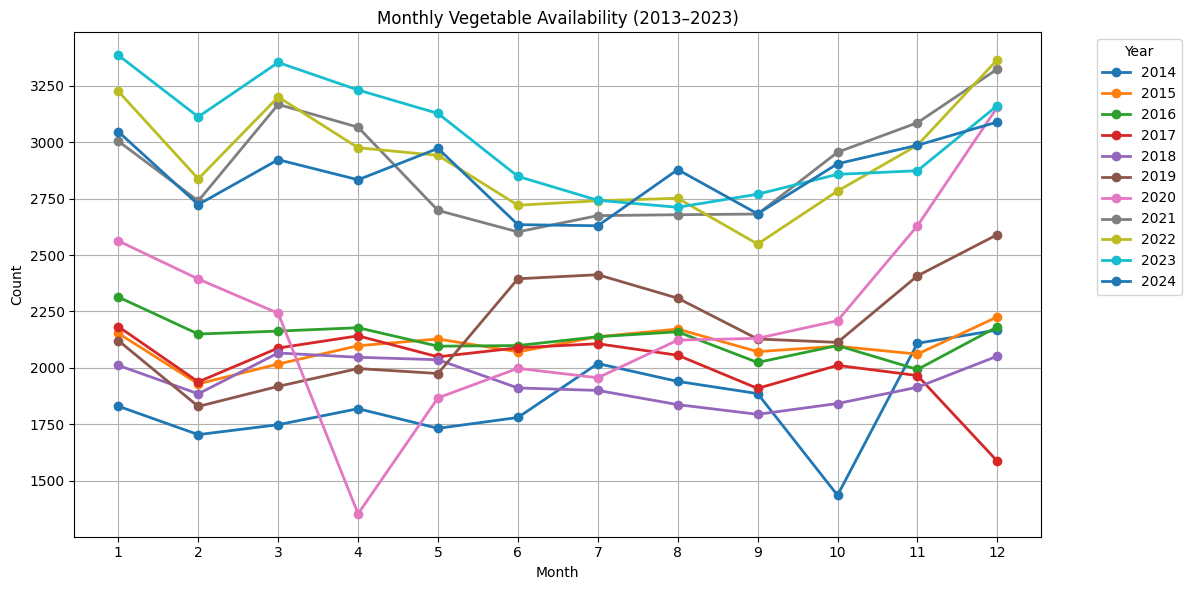

In [35]:
import matplotlib.pyplot as plt

years = list(range(2014, 2025))  
plt.figure(figsize=(12, 6))

for year in years:
    df_year = df_test[df_test['Year'] == year].copy()
    df_year.sort_values(['Month', 'Day'], inplace=True)
    
    x_monthly = df_year['Month'].unique()
    y_monthly = df_year.groupby('Month')['Available'].sum()
    
    plt.plot(x_monthly, y_monthly, marker='o', linewidth=2, label=str(year))

# Labels and legend
plt.title("Monthly Vegetable Availability (2013–2023)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True)
plt.xticks(range(1, 13))  
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')  

plt.tight_layout()
plt.show()


In [266]:
df_test.duplicated().sum()

np.int64(0)

In [267]:
df_test

,Commodity,Year,Month,Day,Weekday,Available
7,Bamboo Shoot,2013,6,16,Sunday,1
6,Bakula,2013,6,16,Sunday,0
5,Avocado,2013,6,16,Sunday,0
4,Asparagus,2013,6,16,Sunday,1
3,Arum,2013,6,16,Sunday,0
...,...,...,...,...,...,...
577175,Tomato Small(Local),2025,5,29,NaN,1
577174,Tomato Small(Indian),2025,5,29,NaN,0
577173,Tomato Big(Nepali),2025,5,29,NaN,1
577172,Tomato Big(Indian),2025,5,29,NaN,1


In [270]:
df_one['Commodity'].nunique()

136

In [9]:
df_test['Available'] = df_test['Available'].astype(int)

In [10]:
df_test.sort_values(['Year','Month','Day'])

,Commodity,Year,Month,Day,Weekday,Available
2395,Amla,2013,6,16,Sunday,0
6137,Apple(Fuji),2013,6,16,Sunday,0
9869,Apple(Jholey),2013,6,16,Sunday,1
13608,Arum,2013,6,16,Sunday,0
17295,Asparagus,2013,6,16,Sunday,1
...,...,...,...,...,...,...
489563,Turnip,2023,9,28,Thursday,0
493301,Turnip A,2023,9,28,Thursday,1
496928,Water Melon(Dotted),2023,9,28,Thursday,0
500672,Water Melon(Green),2023,9,28,Thursday,1


In [21]:
df_test 


,Commodity,Year,Month,Day,Weekday,Available
2395,Amla,2013,6,16,Sunday,False
6137,Apple(Fuji),2013,6,16,Sunday,False
9869,Apple(Jholey),2013,6,16,Sunday,True
13608,Arum,2013,6,16,Sunday,False
17295,Asparagus,2013,6,16,Sunday,True
...,...,...,...,...,...,...
489563,Turnip,2023,9,28,Thursday,False
493301,Turnip A,2023,9,28,Thursday,True
496928,Water Melon(Dotted),2023,9,28,Thursday,False
500672,Water Melon(Green),2023,9,28,Thursday,True


In [22]:
df_test['day_month'] = df_test['Month'].astype(str).str.zfill(2) + '-' + df_test['Day'].astype(str).str.zfill(2)


In [23]:
availability_table = df_test.pivot_table(
    index=['Year', 'day_month'],
    columns='Commodity',
    values='Available',
    fill_value=0
)


In [24]:
availability_table

Commodity       Amla  Apple(Fuji)  Apple(Jholey)  Arum  Asparagus  Avocado  \
Year day_month                                                               
2013 06-16       0.0          0.0            1.0   0.0        1.0      0.0   
     06-17       0.0          0.0            1.0   0.0        1.0      0.0   
     06-18       0.0          0.0            1.0   0.0        1.0      0.0   
     06-19       0.0          0.0            1.0   0.0        1.0      0.0   
     06-20       0.0          0.0            1.0   0.0        1.0      0.0   
...              ...          ...            ...   ...        ...      ...   
2023 09-24       1.0          1.0            1.0   1.0        1.0      1.0   
     09-25       1.0          1.0            1.0   1.0        1.0      1.0   
     09-26       1.0          1.0            1.0   1.0        1.0      1.0   
     09-27       1.0          1.0            1.0   1.0        1.0      1.0   
     09-28       1.0          1.0            1.0   1.0        1.0      1.0   

Commodity       Bakula  Bamboo Shoot  Banana  Barela  ...  \
Year day_month                                        ...   
2013 06-16         0.0           1.0     1.0     0.0  ...   
     06-17         0.0           1.0     1.0     0.0  ...   
     06-18         0.0           1.0     1.0     0.0  ...   
     06-19         0.0           1.0     1.0     0.0  ...   
     06-20         0.0           1.0     1.0     0.0  ...   
...                ...           ...     ...     ...  ...   
2023 09-24         0.0           1.0     1.0     1.0  ...   
     09-25         0.0           1.0     1.0     1.0  ...   
     09-26         0.0           1.0     1.0     1.0  ...   
     09-27         0.0           1.0     1.0     1.0  ...   
     09-28         0.0           1.0     1.0     1.0  ...   

Commodity       Tomato Small(Indian)  Tomato Small(Local)  \
Year day_month                                              
2013 06-16                       0.0                  1.0   
     06-17                       0.0                  1.0   
     06-18                       0.0                  1.0   
     06-19                       0.0                  1.0   
     06-20                       0.0                  1.0   
...                              ...                  ...   
2023 09-24                       1.0                  1.0   
     09-25                       1.0                  1.0   
     09-26                       1.0                  1.0   
     09-27                       1.0                  1.0   
     09-28                       1.0                  1.0   

Commodity       Tomato Small(Terai)  Tomato Small(Tunnel)  Tree Tomato  \
Year day_month                                                           
2013 06-16                      0.0                   0.0          0.0   
     06-17                      0.0                   0.0          0.0   
     06-18                      0.0                   0.0          0.0   
     06-19                      0.0                   0.0          0.0   
     06-20                      0.0                   0.0          0.0   
...                             ...                   ...          ...   
2023 09-24                      0.0                   1.0          0.0   
     09-25                      0.0                   1.0          0.0   
     09-26                      0.0                   1.0          0.0   
     09-27                      0.0                   1.0          0.0   
     09-28                      0.0                   1.0          0.0   

Commodity       Turnip  Turnip A  Water Melon(Dotted)  Water Melon(Green)  Yam  
Year day_month                                                                  
2013 06-16         1.0       1.0                  0.0                 1.0  0.0  
     06-17         0.0       1.0                  0.0                 1.0  0.0  
     06-18         1.0       1.0                  0.0                 1.0  0.0  
     06-19         1.0       

In [39]:
from sklearn.metrics import classification_report, f1_score
from collections import defaultdict
import random
from datetime import datetime, timedelta
best_scores = {
    'f1_avg': 0,
    'first_p': None,
    'second_p': None,
    'report': None
}

first_p_range = [0.02]   # 0.0 to 0.5 step 0.1 (adjust as needed)
second_p_range = [0.2]  # 0.0 to 0.5 step 0.1 (adjust as needed)
simulated_2025_df = None
for first_p in first_p_range:
    for second_p in second_p_range:
        # Compute prob_table inside loop with current first_p and second_p
        prob_table = defaultdict(dict)
        for day in availability_table.index.get_level_values('day_month').unique():
            for commodity in availability_table.columns:
                values = availability_table.xs(day, level='day_month')[commodity]

                freq = values.sum()
                total_years = values.count()

                last_years = values.sort_index().tail(5)
                streak = last_years.sum() == 5

                base_prob = (freq / total_years) - first_p if total_years > 0 else 0
                if streak:
                    base_prob += second_p
                base_prob = min(max(base_prob, 0), 1)  # keep in [0,1]

                prob_table[day][commodity] = base_prob

        # Simulate for 2025
        simulated_rows = []
        for month in range(1, 13):
            for day in range(1, 32):
                try:
                    dt = datetime(year=2025, month=month, day=day)
                except ValueError:
                    continue
                day_month = f"{str(month).zfill(2)}-{str(day).zfill(2)}"
                for commodity in availability_table.columns:
                    prob = prob_table.get(day_month, {}).get(commodity, 0)
                    is_available = int(prob > 0.35)
                    simulated_rows.append({
                        'Year': 2025,
                        'Month': month,
                        'Day': day,
                        'Commodity': commodity,
                        'Available': is_available
                    })
        simulated_2025_df = pd.DataFrame(simulated_rows)
        # Choose a fixed date for evaluation, e.g. 2025-05-29
        y_simulated = simulated_2025_df[
            (simulated_2025_df['Year'] == 2025) &
            (simulated_2025_df['Month'] == 5) &
            (simulated_2025_df['Day'] == 29)
        ]['Available']
        
        # Make sure y_actual aligns properly with y_simulated
        # y_actual should be a binary array with same length and order as y_simulated
        
        # Calculate f1 scores
        f1_avg = f1_score(y_actual, y_simulated, average='weighted')

        # Save best result (can decide which metric you want to optimize)
        if f1_avg > best_scores['f1_avg']:
            best_scores.update({
                'f1_avg': f1_avg,
                'first_p': first_p,
                'second_p': second_p,
                'report': classification_report(y_actual, y_simulated)
            })
print("Best parameters:")
print(f"first_p = {best_scores['first_p']}, second_p = {best_scores['second_p']}")
print(f"Average F1-score: {best_scores['f1_avg']:.3f}")
print("\nClassification report:")
print(best_scores['report'])
new_df = simulated_2025_df


Best parameters:
first_p = 0.02, second_p = 0.2
Average F1-score: 0.810

Classification report:
              precision    recall  f1-score   support

           0       0.60      0.90      0.72        39
           1       0.95      0.76      0.85        97

    accuracy                           0.80       136
   macro avg       0.78      0.83      0.78       136
weighted avg       0.85      0.80      0.81       136



In [97]:
from collections import defaultdict
import random
from datetime import datetime, timedelta
first_p = 0.02
second_p = 0.2
prob_table = defaultdict(dict)

for day in availability_table.index.get_level_values('day_month').unique():
    for commodity in availability_table.columns:
        values = availability_table.xs(day, level='day_month')[commodity]

        freq = values.sum()           # how many years available on that day
        total_years = values.count() # number of years observed for that day

        last_years = values.sort_index().tail(5)
        streak = last_years.sum() == 5

        base_prob = (freq / total_years) -first_p if total_years > 0 else 0
        if streak:
            base_prob += second_p
        base_prob = min(base_prob, 1.0)

        prob_table[day][commodity] = base_prob



simulated_rows = []

# Generate all days of 2025
for month in range(1, 13):
    for day in range(1, 32):  # Simple 31 days; you can handle month length properly if you want
        try:
            dt = datetime(year=2025, month=month, day=day)
        except ValueError:
            continue  # skip invalid dates like April 31

        day_month = f"{str(month).zfill(2)}-{str(day).zfill(2)}"

        for commodity in availability_table.columns:
            prob = prob_table.get(day_month, {}).get(commodity, 0)
            is_available = int(prob > 0.3)
            simulated_rows.append({
                'Year': 2025,
                'Month': month,
                'Day': day,
                'Commodity': commodity,
                'Available': is_available
            })

simulated_2025_df = pd.DataFrame(simulated_rows)
y_simulated = simulated_2025_df[(simulated_2025_df['Year']==2025) & (simulated_2025_df['Day']==29) & (simulated_2025_df['Month']==5)]['Available']
print(classification_report(y_actual,y_simulated))

              precision    recall  f1-score   support

           0       0.77      0.85      0.80        39
           1       0.94      0.90      0.92        97

    accuracy                           0.88       136
   macro avg       0.85      0.87      0.86       136
weighted avg       0.89      0.88      0.88       136



In [322]:
simulated_df

,Year,Month,Day,Commodity,Available
0,2023,9,29,Amla,0
1,2023,9,29,Apple(Fuji),0
2,2023,9,29,Apple(Jholey),1
3,2023,9,29,Arum,1
4,2023,9,29,Asparagus,1
...,...,...,...,...,...
82819,2025,5,29,Turnip,0
82820,2025,5,29,Turnip A,0
82821,2025,5,29,Water Melon(Dotted),0
82822,2025,5,29,Water Melon(Green),1


In [61]:
simulated_df.to_csv('simulated_dataset.csv')

In [240]:
df_test

,Commodity,Unit,Minimum,Maximum,Average,Year,Month,Day,Weekday,Available
0,Amla,NaN,NaN,NaN,NaN,2014,1,1,Wednesday,NaN
1,Amla,NaN,NaN,NaN,NaN,2015,1,1,Thursday,NaN
2,Amla,NaN,NaN,NaN,NaN,2016,1,1,Friday,NaN
3,Amla,NaN,NaN,NaN,NaN,2017,1,1,Sunday,NaN
4,Amla,NaN,NaN,NaN,NaN,2018,1,1,Monday,NaN
...,...,...,...,...,...,...,...,...,...,...
589881,Turnip,NaN,NaN,NaN,NaN,2025,5,29,NaN,0.0
589882,Turnip A,NaN,NaN,NaN,NaN,2025,5,29,NaN,1.0
589883,Water Melon(Dotted),NaN,NaN,NaN,NaN,2025,5,29,NaN,0.0
589884,Water Melon(Green),NaN,NaN,NaN,NaN,2025,5,29,NaN,1.0


In [30]:
y_sin = new_df[(new_df['Year']==2025) & (new_df['Day']==29) & (new_df['Month']==5)]['Available']
print(classification_report(y_actual,y_sin))

new_df.to_csv('simulated_dataset.csv')

              precision    recall  f1-score   support

           0       0.77      0.85      0.80        39
           1       0.94      0.90      0.92        97

    accuracy                           0.88       136
   macro avg       0.85      0.87      0.86       136
weighted avg       0.89      0.88      0.88       136



In [49]:
from sklearn.metrics import classification_report, f1_score
from collections import defaultdict
import random
from datetime import datetime, timedelta
import pandas as pd

# Fixed parameters
first_p = 0.02
second_p = 0.2

# Build probability table
prob_table = defaultdict(dict)
for day in availability_table.index.get_level_values('day_month').unique():
    for commodity in availability_table.columns:
        values = availability_table.xs(day, level='day_month')[commodity]

        freq = values.sum()
        total_years = values.count()

        last_years = values.sort_index().tail(5)
        streak = last_years.sum() == 5

        base_prob = (freq / total_years) - first_p if total_years > 0 else 0
        if streak:
            base_prob += second_p
        base_prob = min(max(base_prob, 0), 1)

        prob_table[day][commodity] = base_prob

# Simulate from 2023-09-29 to today
start_date = datetime(2023, 9, 29)
end_date = datetime.today()

simulated_rows = []
current_date = start_date

while current_date <= end_date:
    day_month = f"{str(current_date.month).zfill(2)}-{str(current_date.day).zfill(2)}"
    
    for commodity in availability_table.columns:
        prob = prob_table.get(day_month, {}).get(commodity, 0)
        is_available = int(prob > 0.3)
        simulated_rows.append({
            'Year': current_date.year,
            'Month': current_date.month,
            'Day': current_date.day,
            'Commodity': commodity,
            'Available': is_available
        })

    current_date += timedelta(days=1)

# Convert to DataFrame
newt_df = pd.DataFrame(simulated_rows)

y_sin = newt_df[(newt_df['Year']==2025) & (newt_df['Day']==29) & (newt_df['Month']==5)]['Available']
print(classification_report(y_actual,y_sin))

newt_df.to_csv('simulated_dataset.csv')

              precision    recall  f1-score   support

           0       0.77      0.85      0.80        39
           1       0.94      0.90      0.92        97

    accuracy                           0.88       136
   macro avg       0.85      0.87      0.86       136
weighted avg       0.89      0.88      0.88       136



In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime  # <- missing import
from sklearn.metrics import f1_score

url = 'https://ramropatro.com/vegetable'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

tbody = soup.find('tbody')
table_rows = tbody.find_all('tr')

df_live = pd.DataFrame(columns=['Commodity', 'Unit', 'Minimum', 'Maximum', 'Average'])

for row in table_rows:
    cols = row.find_all('td')
    if len(cols) >= 5:
        commodity = cols[0].text.strip()
        unit = cols[1].text.strip()
        min_price = cols[2].text.strip()
        max_price = cols[3].text.strip()
        avg_price = cols[4].text.strip()
        
        df_live.loc[len(df_live)] = [commodity, unit, min_price, max_price, avg_price]

# Add today's date
today = datetime.today()
df_live['Year'] = today.year
df_live['Month'] = today.month
df_live['Day'] = today.day

# Load existing CSV and append today's data
live_df = pd.read_csv('live_kalimati.csv')
live_df = pd.concat([live_df, df_live], ignore_index=True)
print(live_df.duplicated(subset=['Commodity','Year','Month','Day']).sum())
live_df.drop_duplicates(subset=['Commodity','Year','Month','Day'],inplace=True)

# Save updated DataFrame
live_df.to_csv('live_kalimati.csv', index=False)


1


In [4]:
print(live_df.duplicated(subset=['Commodity','Year','Month','Day']).sum())

0


,Unnamed: 0,Commodity,Unit,Minimum,Maximum,Average,Year,Month,Day
0,0.0,Tomato Big(Nepali),Kg,40,50,45,2025,5,29
1,1.0,Tomato Big(Indian),Kg,50,60,55,2025,5,29
2,2.0,Tomato Small(Local),Kg,50,65,58,2025,5,29
3,3.0,Tomato Small(Tunnel),Kg,65,75,70,2025,5,29
4,4.0,Tomato Small(Indian),Kg,60,70,65,2025,5,29
...,...,...,...,...,...,...,...,...,...
189,NaN,Clive Dry,Kg,180,200,190,2025,5,30
190,NaN,Clive Green,Kg,100,150,127,2025,5,30
191,NaN,Fish Fresh(Rahu),Kg,300,320,310,2025,5,30
192,NaN,Fish Fresh(Bachuwa),Kg,300,320,310,2025,5,30


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df_practice[['Commodity', 'Weekday']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Commodity', 'Weekday']))

df_practice = pd.concat([df_practice.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

X_train, X_test, y_train,y_test = train_test_split(df_practice.drop(['Commodity','Available','Weekday'],axis=1),df_practice['Available'],train_size=0.9,random_state=42)
feature_names = X_train.columns
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.metrics import classification_report

# Assuming X_train_scaled, X_test_scaled, y_train, y_test already defined as you wrote

input_dim = X_train_scaled.shape[1]

# Build the model
model = Sequential([
    Input(shape=(input_dim,)),               # 👈 Explicit Input layer
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')           # Binary classification output
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_split=0.1,
                    verbose=2)

# Predict on test set
y_pred_prob = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate
print(classification_report(y_test, y_pred))



Epoch 1/20
14545/14545 - 15s - 1ms/step - accuracy: 0.8687 - loss: 0.2931 - val_accuracy: 0.9083 - val_loss: 0.2208
Epoch 2/20
14545/14545 - 14s - 950us/step - accuracy: 0.9119 - loss: 0.2182 - val_accuracy: 0.9304 - val_loss: 0.1790
Epoch 3/20
14545/14545 - 14s - 953us/step - accuracy: 0.9228 - loss: 0.1960 - val_accuracy: 0.9373 - val_loss: 0.1653
Epoch 4/20
14545/14545 - 14s - 953us/step - accuracy: 0.9282 - loss: 0.1855 - val_accuracy: 0.9379 - val_loss: 0.1582
Epoch 5/20
14545/14545 - 14s - 959us/step - accuracy: 0.9304 - loss: 0.1798 - val_accuracy: 0.9426 - val_loss: 0.1509
Epoch 6/20
14545/14545 - 15s - 1ms/step - accuracy: 0.9329 - loss: 0.1751 - val_accuracy: 0.9436 - val_loss: 0.1490
Epoch 7/20
14545/14545 - 14s - 961us/step - accuracy: 0.9340 - loss: 0.1730 - val_accuracy: 0.9443 - val_loss: 0.1474
Epoch 8/20
14545/14545 - 14s - 985us/step - accuracy: 0.9354 - loss: 0.1704 - val_accuracy: 0.9461 - val_loss: 0.1457
Epoch 9/20
14545/14545 - 14s - 952us/step - accuracy: 0.9356

In [10]:
df_one[['Commodity','Unit']].unique()

array(['kg', 'doz', '1 pc', 'per dozen', 'per piece'], dtype=object)

,Commodity,Unit
0,Tomato Big(Nepali),kg
1,Tomato Small(Local),kg
2,Potato Red,kg
3,Potato White,kg
4,Onion Dry (Indian),kg
...,...,...
224811,Avocado,kg
224812,Amla,kg
242491,Banana,per dozen
259532,Sugarcane,per piece


,Commodity,Year,Month,Day,Weekday,Available
2395,Amla,2013,6,16,Sunday,False
6137,Apple(Fuji),2013,6,16,Sunday,False
9869,Apple(Jholey),2013,6,16,Sunday,True
13608,Arum,2013,6,16,Sunday,False
17295,Asparagus,2013,6,16,Sunday,True
...,...,...,...,...,...,...
487083,Turnip,2020,12,31,Thursday,True
490810,Turnip A,2020,12,31,Thursday,True
494521,Water Melon(Dotted),2020,12,31,Thursday,False
498175,Water Melon(Green),2020,12,31,Thursday,True


In [13]:
commodity_unit_dict

{'Tomato Big(Nepali)': 'kg',
 'Tomato Small(Local)': 'kg',
 'Potato Red': 'kg',
 'Potato White': 'kg',
 'Onion Dry (Indian)': 'kg',
 'Carrot(Local)': 'kg',
 'Cabbage(Local)': 'kg',
 'Cauli Local': 'kg',
 'Raddish Red': 'kg',
 'Raddish White(Local)': 'kg',
 'Brinjal Long': 'kg',
 'Brinjal Round': 'kg',
 'Cow pea(Long)': 'kg',
 'Green Peas': 'kg',
 'French Bean(Local)': 'kg',
 'Soyabean Green': 'kg',
 'Bitter Gourd': 'kg',
 'Bottle Gourd': 'kg',
 'Pointed Gourd(Local)': 'kg',
 'Snake Gourd': 'kg',
 'Smooth Gourd': 'kg',
 'Sponge Gourd': 'kg',
 'Pumpkin': 'kg',
 'Squash(Long)': 'kg',
 'Turnip': 'kg',
 'Okara': 'kg',
 'Christophine': 'kg',
 'Brd Leaf Mustard': 'kg',
 'Spinach Leaf': 'kg',
 'Cress Leaf': 'kg',
 'Mustard Leaf': 'kg',
 'Fenugreek Leaf': 'kg',
 'Onion Green': 'kg',
 'Mushroom(Kanya)': 'kg',
 'Asparagus': 'kg',
 'Neuro': 'kg',
 'Brocauli': 'kg',
 'Sugarbeet': 'kg',
 'Drumstick': 'kg',
 'Red Cabbbage': 'kg',
 'Lettuce': 'kg',
 'Celery': 'kg',
 'Parseley': 'kg',
 'Fennel Leaf': '

In [16]:
df_practice

,Commodity,Year,Month,Day,Weekday,Available
2395,Amla,2013,6,16,Sunday,False
6137,Apple(Fuji),2013,6,16,Sunday,False
9869,Apple(Jholey),2013,6,16,Sunday,True
13608,Arum,2013,6,16,Sunday,False
17295,Asparagus,2013,6,16,Sunday,True
...,...,...,...,...,...,...
489563,Turnip,2023,9,28,Thursday,False
493301,Turnip A,2023,9,28,Thursday,True
496928,Water Melon(Dotted),2023,9,28,Thursday,False
500672,Water Melon(Green),2023,9,28,Thursday,True


In [20]:
df_practice.sort_values(['Year','Month','Day'])

,Commodity,Year,Month,Day,Weekday,Available
2395,Amla,2013,6,16,Sunday,False
6137,Apple(Fuji),2013,6,16,Sunday,False
9869,Apple(Jholey),2013,6,16,Sunday,True
13608,Arum,2013,6,16,Sunday,False
17295,Asparagus,2013,6,16,Sunday,True
...,...,...,...,...,...,...
489563,Turnip,2023,9,28,Thursday,False
493301,Turnip A,2023,9,28,Thursday,True
496928,Water Melon(Dotted),2023,9,28,Thursday,False
500672,Water Melon(Green),2023,9,28,Thursday,True


In [22]:
df_one['Unit'].unique()

array(['Kg', 'Doz', '1 Pc', 'KG', 'Per Dozen', 'Per Piece'], dtype=object)

In [9]:
df_practice['Commodity'].unique()

array(['Amla', 'Apple(Fuji)', 'Apple(Jholey)', 'Arum', 'Asparagus',
       'Avocado', 'Bakula', 'Bamboo Shoot', 'Banana', 'Barela',
       'Bauhania flower', 'Bitter Gourd', 'Bottle Gourd',
       'Brd Leaf Mustard', 'Brinjal Long', 'Brinjal Round', 'Brocauli',
       'Cabbage', 'Cabbage(Local)', 'Cabbage(Terai)', 'Capsicum',
       'Carrot(Local)', 'Carrot(Terai)', 'Cauli Local',
       'Cauli Local(Jyapu)', 'Cauli Terai', 'Celery', 'Chilli Dry',
       'Chilli Green', 'Chilli Green(Akbare)', 'Chilli Green(Bullet)',
       'Chilli Green(Machhe)', 'Christophine', 'Clive Dry', 'Clive Green',
       'Coriander Green', 'Cow pea(Long)', 'Cowpea(Short)', 'Cress Leaf',
       'Cucumber(Hybrid)', 'Cucumber(Local)', 'Drumstick', 'Fennel Leaf',
       'Fenugreek Leaf', 'Fish Fresh', 'Fish Fresh(Bachuwa)',
       'Fish Fresh(Chhadi)', 'Fish Fresh(Mungari)', 'Fish Fresh(Rahu)',
       'French Bean(Hybrid)', 'French Bean(Local)', 'French Bean(Rajma)',
       'Garlic Dry Chinese', 'Garlic Dry Nepal

In [37]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,r2_score
import numpy as np

item = 'Water Melon(Dotted)'

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df_practice[['Commodity', 'Weekday']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Commodity', 'Weekday']))

df_practice = pd.concat([df_practice.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

X_train, X_test, y_train,y_test = train_test_split(df_practice.drop(['Commodity','Available','Weekday'],axis=1),df_practice['Available'],train_size=0.9,random_state=42)
feature_names = X_train.columns
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
""
#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier()
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train_scaled,y_train)
pred2 = model.predict(X_test_scaled)
print(r2_score(y_test,pred2))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97     24691
        True       0.98      0.98      0.98     33697

    accuracy                           0.97     58388
   macro avg       0.97      0.97      0.97     58388
weighted avg       0.97      0.97      0.97     58388



In [39]:
from sklearn.metrics import classification_report,r2_score
print(r2_score(y_test,pred2))

0.8879977959757575


In [41]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score
import pandas as pd
import xgboost as xgb

# Encode categorical features
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df_practice[['Commodity', 'Weekday']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Commodity', 'Weekday']))

df_practice = pd.concat([df_practice.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Split features and target
X = df_practice.drop(['Commodity', 'Available', 'Weekday'], axis=1)
y = df_practice['Available']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

# Optional scaling (XGBoost does not require scaling, but no harm if you want)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# Define hyperparameter grid for XGBoost
param_grid = {
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Setup GridSearchCV with R2 scoring
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=1  # set to 1 or a small number if memory issues persist
)

# Fit grid search on scaled training data
grid_search.fit(X_train_scaled, y_train)

# Best model and score
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R2:", grid_search.best_score_)

# Evaluate on test set
y_pred = best_model.predict(X_test_scaled)
print("Test R2 score:", r2_score(y_test, y_pred))


Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validated R2: 0.8951280951499939
Test R2 score: 0.8971399068832397


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,r2_score
import numpy as np

item = 'Water Melon(Dotted)'

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df_practice[['Commodity', 'Weekday']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Commodity', 'Weekday']))

df_practice = pd.concat([df_practice.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

X_train, X_test, y_train,y_test = train_test_split(df_practice.drop(['Commodity','Available','Weekday'],axis=1),df_practice['Available'],train_size=0.9,random_state=42)
feature_names = X_train.columns
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

import xgboost as xgb
model = xgb.XGBRegressor(colsample_bytree= 1, learning_rate= 0.2, max_depth= 10, n_estimators= 200, subsample= 0.8)
model.fit(X_train_scaled,y_train)
pred2 = model.predict(X_test_scaled)
print(r2_score(y_test,pred2))